Code Block #1: Imported Libraries

In [100]:
" Pytorch - Required for the network. "
import torch
import torch.nn as nn
import torch.nn.functional as F

" Pandas - Required for data management. "
import pandas as pd

" IPython - Not required but nice for visualizing the pandas dataframes. "
from IPython.display import display

" sklearn - Required for transforming training data (OneHotEncoding & Imputing) ; Used for splitting training and test set. "
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

" Matplotlib - Required for plotting and visualization. "
import matplotlib.pyplot as plt

" Numpy - Required for simple math. "
import numpy as np

Code Block #2: Processing Training Data

- Question: How did I deal with missing data / what were my data preprocessing steps?

    Before starting anything for this project, the first thing I did was open the provided training data in excel and go through each of the training features.
    I wanted to see which features were of categorical and scalar type. By doing this, I could see which features I would need to apply an extra preprocessing
    step of OneHotEncoding to convert the data types from categorical to scalar. 
    
    For the non categorical features, I create a for loop that would track the amount of missing data or NaN's present. By doing this, I could make a list of which features 
    I needed to either fill the missing data, remove the feature from the training data, or remove the data points as a whole from the training data. I decided for each feature
    that had missing data, I would replace the missing data with the mean of the available data. I decided to use the mean by testing the performance of the model with using a
    mean, median, and mode strategy and found that mean had the best performance with median not far off.

In [101]:
" Read in training input and output data as a pandas dataframe to train our model. "
Training_Input_Data_df = pd.read_csv('/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 2/project2_training_input.csv')
Training_Output_Data_df = pd.read_csv('/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 2/project2_training_output.csv', names=['output'])

" Look at top 5 values of the dataframe for visualization. "
# display(Training_Input_Data_df.head())

" List of features with categorial data and each features categories. "
# print(Training_Input_Data_df['State_Factor'].unique()) # 'State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11'
# print(Training_Input_Data_df['building_class'].unique()) # 'Commercial' 'Residential'
# print(Training_Input_Data_df['facility_type'].unique()) # Long list, just uncomment and print to get all the categories

""" Use make_column_transformer and call the OneHotEncoder function on each feature column that contains categorical data. 
    If the features don't have categorical data, then passthrough the feature and do nothing. We know which features are 
    categorical type data from calling the unique function above and manually reading through the csv file. """
Column_Transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['State_Factor']),
    (OneHotEncoder(sparse_output=False), ['building_class']),
    (OneHotEncoder(sparse_output=False), ['facility_type']),
    remainder='passthrough'
)

" Change the Column_Transformer variable to a pandas dataframe and fit it to the original training input dataframe. "
Column_Transformer.set_output(transform='pandas')
Training_Input_Data_df = Column_Transformer.fit_transform(Training_Input_Data_df)

" Check the dataframe again to ensure the OneHotEncoding worked. "
# display(Training_Input_Data_df.head())

" Check every feature in the training input dataframe for any NaN or missing data. This is commented out so your console isn't flooded. "
# for feature in Training_Input_Data_df:
#     print(feature, Training_Input_Data_df[feature].isna().sum())
    
" List of all features with Nan and amount of Nan found for each feature. "
# year_built: 1462, energy_star_rating: 21345, 
# direction_max_wind_speed: 32843, direction_peak_wind_speed: 33440
# max_wind_speed: 32843, days_with_fog: 36666

" From the above loop, append all features that contain Nan's or missing data. "
Nan_List = ['remainder__year_built', 'remainder__energy_star_rating', 'remainder__direction_max_wind_speed', 
            'remainder__direction_peak_wind_speed', 'remainder__max_wind_speed', 'remainder__days_with_fog']

" Call the imputer function with the mean strategy. Mean strategy will find the mean of each columns numerical data. "
imputer = SimpleImputer(strategy='mean')

" Use a for loop to input the mean for every datapoint that has missing data for each feature in the NaN List. "
for Nan_Feature in Nan_List:
    Training_Input_Data_df[[Nan_Feature]] = imputer.fit_transform(Training_Input_Data_df[[Nan_Feature]]).round()

" Check that the OneHotEncoder and Imputer worked. "
display(Training_Input_Data_df.head())
display(Training_Output_Data_df.head())


,onehotencoder-1__State_Factor_State_1,onehotencoder-1__State_Factor_State_10,onehotencoder-1__State_Factor_State_11,onehotencoder-1__State_Factor_State_2,onehotencoder-1__State_Factor_State_4,onehotencoder-1__State_Factor_State_6,onehotencoder-1__State_Factor_State_8,onehotencoder-2__building_class_Commercial,onehotencoder-2__building_class_Residential,onehotencoder-3__facility_type_2to4_Unit_Building,...,remainder__days_below_0F,remainder__days_above_80F,remainder__days_above_90F,remainder__days_above_100F,remainder__days_above_110F,remainder__direction_max_wind_speed,remainder__direction_peak_wind_speed,remainder__max_wind_speed,remainder__days_with_fog,remainder__id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,14,0,0,0,1.0,1.0,1.0,109.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,14,0,0,0,1.0,63.0,1.0,12.0,2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,14,0,0,0,1.0,63.0,1.0,12.0,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,14,0,0,0,1.0,1.0,1.0,109.0,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,14,0,0,0,1.0,1.0,1.0,109.0,5


,output
0,248.682615
1,24.693619
2,48.406926
3,3.899395
4,6.597715


Code Block #3: Neurel Net Function

- Question: Explain your model approach. How did I choose my hyperparameter values?

    For my NN model, I decided to use 6 layers (5 hidden layers + output layer). The input for the 1st layer is equal to the amount of features in the training data set.
    All hidden layers have 200 hidden units with the output layer being of size 1 since we want a scalar output (Regression). I decided to use ReLu for each hidden layers
    activation function as ReLu is a strong/popular choice for regression type problems. The ouput layer was kept linear as we do not require any specific type activation
    function like sigmoid or softmax since those are typically used in classification problems to bound the ouput between 0 and 1. The number of hidden layers and units 
    was decided based on trial and error with running my model and monitoring the performance.

    I chose a dropout rate of 0.25 as having to low or to high of a drop out rate significantly decreased performance. I experimented with a rate of 0.25, 0.3, 0.4, and
    0.5 and found 0.25 to have the best performance.
    

In [102]:
" Pytorch nerual net class function. "

class Model(nn.Module):
    
    """ Standard __init__ function found in all python classes.  __init__  function takes in the amount of input features from the training data, 
        the amount of hidden units in each of the 5 layers, and the amount of outputs from the model. """
    def __init__(self, input_features = 129, HL1 = 200, HL2 = 200, 
                 HL3 = 200, HL4 = 200, HL5 = 200, output = 1):
        
        super().__init__()
        
        " Five hidden layers with the output of each layer as the input into the next layer to create fully connected layers. "
        self.fc1 = nn.Linear(input_features, HL1)
        self.fc2 = nn.Linear(HL1, HL2)
        self.fc3 = nn.Linear(HL2, HL3)
        self.fc4 = nn.Linear(HL3, HL4)
        self.fc5 = nn.Linear(HL4, HL5)

        self.out = nn.Linear(HL5, output)

        " relu function used as the activation function for each layer. "
        self.relu = nn.ReLU()

        """ We use dropout with a 25% chance to set a random amount of hidden units to 0 during the training process.
            Dropout is helpful to try combat overfitting in the model. """
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        
        " Call the relu function for each hidden layer. Then call the dropout function for the same layer. "
        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        x = F.relu(self.fc3(x))
        x = self.dropout(x)

        x = F.relu(self.fc4(x))
        x = self.dropout(x)

        x = F.relu(self.fc5(x))
        x = self.dropout(x)

        " Final output layer. "
        x = self.out(x)
        return x

Code Block #4: Splitting the training data

In [103]:
" Set the dataframes equal to X and y and call the .values function to change the data type. "
X = Training_Input_Data_df
y = Training_Output_Data_df

X = X.values
y = y.values

""" Split the original training data set into a training and validation set. The validation set was made to 10% of the original
    training set to allow as much training for the model as possible. """
X_Train, X_Validation, y_Train, y_Validation = train_test_split(X, y, test_size = 0.1)

" Convert the training and validation data to pytorch tensors. This is required to be fed into the model. "
X_Train = torch.FloatTensor(X_Train)
X_Validation = torch.FloatTensor(X_Validation)

" Convert the output to trainign tensors as well. "
y_Train = torch.FloatTensor(y_Train)
y_Validation = torch.FloatTensor(y_Validation)


Code Block #5: Epoch passthrough

- Question: Explain your model approach. How did I choose my hyperparameter values?

    1. Learning Rate: 
        - I decided on a learning rate of 0.0005 through trial and error. Originally, I had a learning rate of 0.001 but noticed the output was almost exactly
        the same for every data point. After some basic research and experimenting, I found a learning rate of 0.0001 - 0.0005 to have the highest performance 
        and decided to stick with 0.0005.

    2. Error Function:
        - I decided to use the mean squared error loss function as it is the standard and most well known loss function for regression type problems.

    3. Epoch amount:
        - I decided on a epoch amount of 5000 by monitoring the performance and incrementally increasing the epoch count without seeing any signs of overfitting.

Epoch: 0 | Loss: 124757.046875
Epoch: 1000 | Loss: 3345.255126953125
Epoch: 2000 | Loss: 3187.441162109375
Epoch: 3000 | Loss: 2877.724365234375
Epoch: 4000 | Loss: 2794.959228515625
Epoch: 4999 | Loss: 2755.24462890625


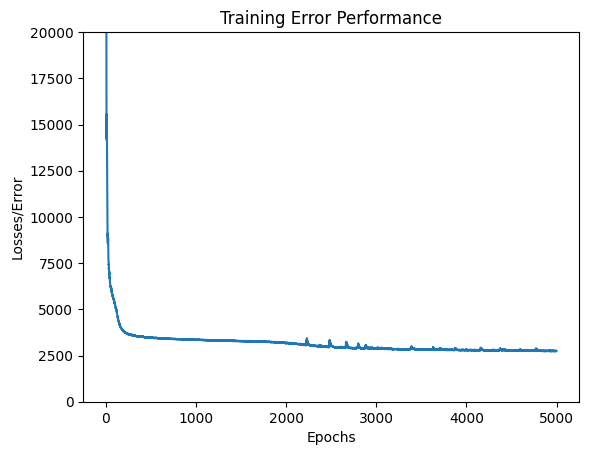

In [104]:
" Set the pytorch random seed. The value for the random seed is arbitrary. "
torch.manual_seed(41)

" Call the model to start training. "
model = Model()

" Set the error/loss function to mean squared error. We are using MSE since this is a regression type problem. "
criterion = nn.MSELoss()

" Call the ADAM optimizer with a learning rate of 0.0005. "
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)

" Losses list so we can store the loss per epoch for error/loss plotting. "
losses = []

" Total epoch count. "
epoch = 5000

" Training Loop - Loop for the amount of epochs set above. "
for Idx in range(epoch):

    " Forward pass the training data through the model to get the predicted output. "
    y_pred = model.forward(X_Train)

    " Track the loss by comparing the predicted output and actual output using MSE. "
    loss = criterion(y_pred, y_Train)

    " Append the loss per epoch to the losses list. Need to .detach().numpy() to convert data type for future plotting. "
    losses.append(loss.detach().numpy())

    " Print the losses for every 1000 epochs. "
    if Idx % 1000 == 0:
        print(f'Epoch: {Idx} | Loss: {loss}')

    " Call the zero_Grad function to zero out the gradient before conducting back propogation through the network. "
    optimizer.zero_grad()

    " Call backward to update the weights of the model using back propogation. "
    loss.backward()

    " Use .step() to update the model parameters. "
    optimizer.step()

" Save the model for future work. "
# torch.save(model.state_dict(), 'model_state_dict.pth')

" Print the final epoch losses. "
print(f'Epoch: {Idx} | Loss: {losses[-1]}')

" Plot the losses across epochs to check for overfitting and performance. "
plt.plot(range(epoch), losses)
plt.title('Training Error Performance')
plt.xlabel('Epochs')
plt.ylabel('Losses/Error')
plt.ylim(0,20000)

plt.show()

Code Block #6: Plotting training error and checking the validation set

Training Set Epoch Count: 5000 | Training Set Error: 2755.24462890625
Validation Set Error: 2623.221923828125


Text(0, 0.5, 'Energy Consumption')

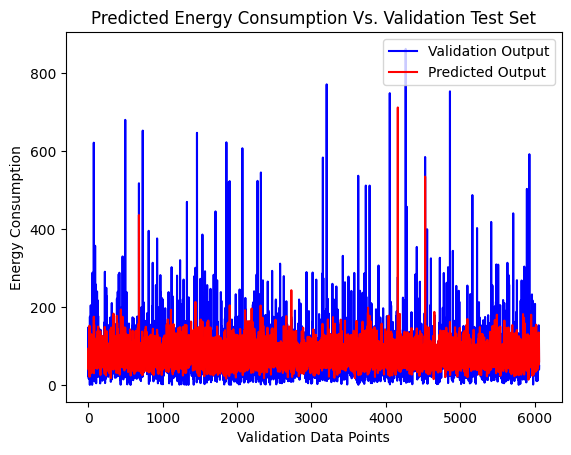

In [105]:
" Reload the model if further work is required. "
# model = Model()
# model.load_state_dict(torch.load('model_state_dict.pth'))

" Process the validation set and forward pass through the model to get validation prediction. "
with torch.no_grad():
    y_pred = model.forward(X_Validation)
    loss = criterion(y_pred, y_Validation)

" Print the total training error and validation error. "
print(f'Training Set Epoch Count: {epoch} | Training Set Error: {losses[-1]}')
print(f'Validation Set Error: {loss}')

" Plot the actual validation output vs the predicted validation output "
plt.plot(range(len(y_Validation)), y_Validation, c = 'blue')
plt.plot(range(len(y_pred)),y_pred.flatten(), c = 'red')

plt.title('Predicted Energy Consumption Vs. Validation Test Set')
plt.legend(["Validation Output", "Predicted Output"], loc="upper right")
plt.xlabel('Validation Data Points')
plt.ylabel('Energy Consumption')

Code Block #7: Processing and Test Set Prediction

- Question: How did I deal with missing data / what were my data preprocessing steps?

    After completing my model training, I tried to run the test set but noticed a sizing error with the test input data. After probing, I noticed that
    the 'facility_type' feature in the training data had less categories (I.e. 'Lodging_Uncategorized', 'Mixed_Use_Predominantly_Residential'). To fix this,
    I added two more features into the test data set which were the missing categories from 'facility_type' and set them to 0. Aside from this issue, I applied
    the same preprocessing steps of OneHotEncoding the categorical data and using the mean to fill missing/NaN data for each required feature. No other extra steps
    were required to use the test data.

Text(0, 0.5, 'Energy Consumption')

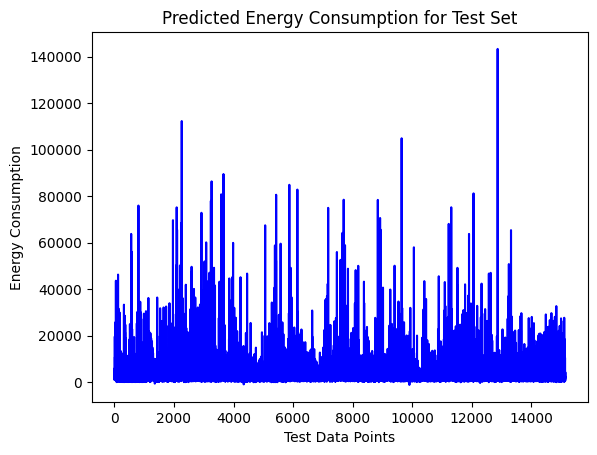

In [107]:
" Load the training and test input data. This was required to fix an issue with the test data. "
Training_Input_Data = pd.read_csv('/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 2/project2_training_input.csv')
Test_Input_Data = pd.read_csv('/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 2/project2_test_input.csv')

" Double check the unique categories for each of the categorial type features. "
# print(Test_Input_Data['State_Factor'].unique()) # 'State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11'
# print(Test_Input_Data['building_class'].unique()) # 'Commercial' 'Residential'
# print(Test_Input_Data['facility_type'].unique() # Long list, just uncomment and print to get all the categories

" Verify that the number of unique facilities are the same for both the training and test set. "
Training_Facilities = Training_Input_Data['facility_type'].unique()
Testing_Facilities = Test_Input_Data['facility_type'].unique()

" Find the facility types that do not appear in the test set but are present in the training set. "
Differnece_In_Facilities = set(Training_Facilities).difference(Testing_Facilities) # {'Lodging_Uncategorized', 'Mixed_Use_Predominantly_Residential'}

" Create features for the missing facility types but set them to zero. This is required to fix sizing issues with the test set. "
for Facilitiy in Differnece_In_Facilities:
    Test_Input_Data[Facilitiy] = 0

" Similar to the training data, call the OneHotEncoder function to convert the categorical type features into integer values. "
Column_Transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['State_Factor']),
    (OneHotEncoder(sparse_output=False), ['building_class']),
    (OneHotEncoder(sparse_output=False), ['facility_type']),
    remainder='passthrough'
)

" Change the Column_Transformer variable to a pandas dataframe and fit it to the original training input dataframe. "
Column_Transformer.set_output(transform='pandas')
Test_Input_Data_df = Column_Transformer.fit_transform(Test_Input_Data)

" Check the dataframe again to ensure the OneHotEncoding worked. "
# display(Training_Input_Data_df.head())

" Check every feature in the training input dataframe for any NaN or missing data. This is commented out so your console isn't flooded. "
# for feature in Test_Input_Data_df:
    
    # print(feature, Test_Input_Data_df[feature].isna().sum())
    
" List of all features with Nan and amount of Nan found for each feature "
    # year_built: 375, energy_star_rating: 5364, 
    # direction_max_wind_speed: 8239, direction_peak_wind_speed: 8371
    # max_wind_speed: 8239, days_with_fog: 9130

" From the above loop, append all features that contain Nan's or missing data. "
Nan_List = ['remainder__year_built', 'remainder__energy_star_rating', 'remainder__direction_max_wind_speed', 
            'remainder__direction_peak_wind_speed', 'remainder__max_wind_speed', 'remainder__days_with_fog']

" Call the imputer function with the mean strategy. Mean strategy will find the mean of each columns numerical data. "
imputer = SimpleImputer(strategy='mean')

" Use a for loop to input the mean for every datapoint that has missing data for each feature in the NaN List. "
for Nan_Feature in Nan_List:
    # Fit and transform the imputer on the single-column DataFrame
    Test_Input_Data_df[[Nan_Feature]] = imputer.fit_transform(Test_Input_Data_df[[Nan_Feature]]).round()

" Convert the test input data to a pytorch tensor. "
Test_Input_Data_df = Test_Input_Data_df.values
Test_Input_Data_df = torch.FloatTensor(Test_Input_Data_df)

" Pass the test input data through the model to and receive the output predictions. "
with torch.no_grad():
    y_pred = model.forward(Test_Input_Data_df)

" Convert the output predictions to a numpy and then into a pandas dataframe. This was done for ease to convert to a csv file. "
Test_Output = y_pred.detach().numpy()
Test_Output_df = pd.DataFrame(Test_Output)
Test_Output_df.to_csv('test_out.csv', index = False)

" Plot the predicted output for the test set "
plt.plot(range(len(Test_Output)), Test_Output, c = 'blue')
plt.title('Predicted Energy Consumption for Test Set')
plt.xlabel('Test Data Points')
plt.ylabel('Energy Consumption')